In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change working directory to the project folder
base_folder = "/content/drive/MyDrive/TextMining_Project"
os.chdir(base_folder)

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

Using TF-IDF preprocessed data (tfidf_data.csv) – it is ideal because it gives us a numeric representation for clustering.

In [19]:
# Load the TF-IDF matrix (unlabeled numeric data)
df_tfidf = pd.read_csv("tfidf_data.csv")

X = df_tfidf.drop(columns=["bert_label"], errors="ignore")
X.head()

,10,16,19,2024,2025,230,abc,about,access,act,...,will,with,work,working,world,worry,year,york,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327071,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.567173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Normalize the data:**

In [20]:
# Normalize the data (useful for cosine-based metrics)

X_norm = normalize(X)

**K-Means Clustering:**

In [21]:
sil_scores = []
k_values = range(2, 8)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_norm)
    sil = silhouette_score(X_norm, labels)
    sil_scores.append(sil)

In [22]:
from tabulate import tabulate

table_data = [(k, X_norm.shape[0], round(sil, 4)) for k, sil in zip(k_values, sil_scores)]

headers = ["k (Clusters)", "n (Samples)", "Silhouette Score"]

print(tabulate(table_data, headers=headers, tablefmt="github"))

|   k (Clusters) |   n (Samples) |   Silhouette Score |
|----------------|---------------|--------------------|
|              2 |          1054 |             0.0096 |
|              3 |          1054 |             0.0143 |
|              4 |          1054 |             0.014  |
|              5 |          1054 |             0.0172 |
|              6 |          1054 |             0.0182 |
|              7 |          1054 |             0.021  |


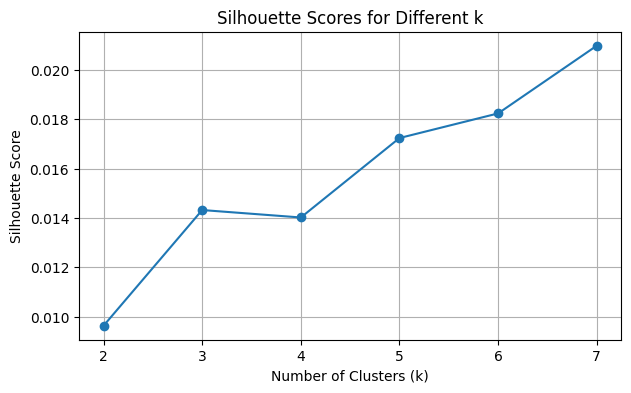

In [23]:
# Plot silhouette scores
plt.figure(figsize=(7,4))
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

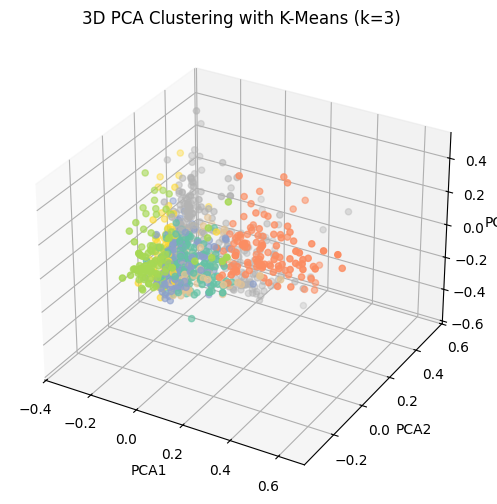

In [24]:
k_best = 7 # Based on Silhouette scores
kmeans = KMeans(n_clusters=k_best, random_state=42)
labels = kmeans.fit_predict(X_norm)

# Apply PCA for 3D visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_norm)

# Plot 3D clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap="Set2", s=20)
ax.set_title("3D PCA Clustering with K-Means (k=3)")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()